In [4]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [5]:
"""
使用决策树对泰坦尼克号进行预测生死
:return:
"""
#获取数据
titan=pd.read_csv("titanic.csv")

In [6]:
titan.head(10)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male
5,6,1st,1,"Anderson, Mr Harry",47.0000,Southampton,"New York, NY",E-12,NaN,3,male
6,7,1st,1,"Andrews, Miss Kornelia Theodosia",63.0000,Southampton,"Hudson, NY",D-7,13502 L77,10,female
7,8,1st,0,"Andrews, Mr Thomas, jr",39.0000,Southampton,"Belfast, NI",A-36,NaN,NaN,male
8,9,1st,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58.0000,Southampton,"Bayside, Queens, NY",C-101,NaN,2,female
9,10,1st,0,"Artagaveytia, Mr Ramon",71.0000,Cherbourg,"Montevideo, Uruguay",NaN,NaN,(22),male


In [7]:
 #票的类别、年龄、性别
x=titan[['pclass','age','sex']]
#缺失值处理:默认用年龄的平均值并替换
x['age'].fillna(x['age'].mean(),inplace=True)
x.head(10)

/Users/xun/app/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,pclass,age,sex
0,1st,29.0000,female
1,1st,2.0000,female
2,1st,30.0000,male
3,1st,25.0000,female
4,1st,0.9167,male
5,1st,47.0000,male
6,1st,63.0000,female
7,1st,39.0000,male
8,1st,58.0000,female
9,1st,71.0000,male


In [8]:
#目标值是否存活
y=titan['survived']

In [9]:
#分割数据集为训练集、测试集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [10]:
#进行处理，特种工程 特征-》类别-》One Hot编码
dict=DictVectorizer(sparse=False)
x_train=dict.fit_transform(x_train.to_dict(orient="records"))
x_test=dict.transform(x_test.to_dict(orient="records"))
print(dict.get_feature_names())
print(x_train)

['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male']
[[31.19418104  0.          0.          1.          0.          1.        ]
 [31.19418104  0.          0.          1.          0.          1.        ]
 [31.19418104  0.          1.          0.          0.          1.        ]
 ...
 [26.          0.          1.          0.          0.          1.        ]
 [59.          0.          1.          0.          0.          1.        ]
 [31.19418104  0.          0.          1.          0.          1.        ]]


In [11]:
#使用决策树进行预测
dec=DecisionTreeClassifier();
dec.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
#模型保存、加载
import joblib
#模型训练保存好的模型
joblib.dump(dec,"./dec_20220518.pkl")
#载入模型
dec_model=joblib.load("./dec_20220518.pkl");
predict_data=dec_model.predict(x_test)
print(predict_data)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0
 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0]


In [15]:
print("准确率：",dec.score(x_test,y_test))

准确率： 0.8024316109422492


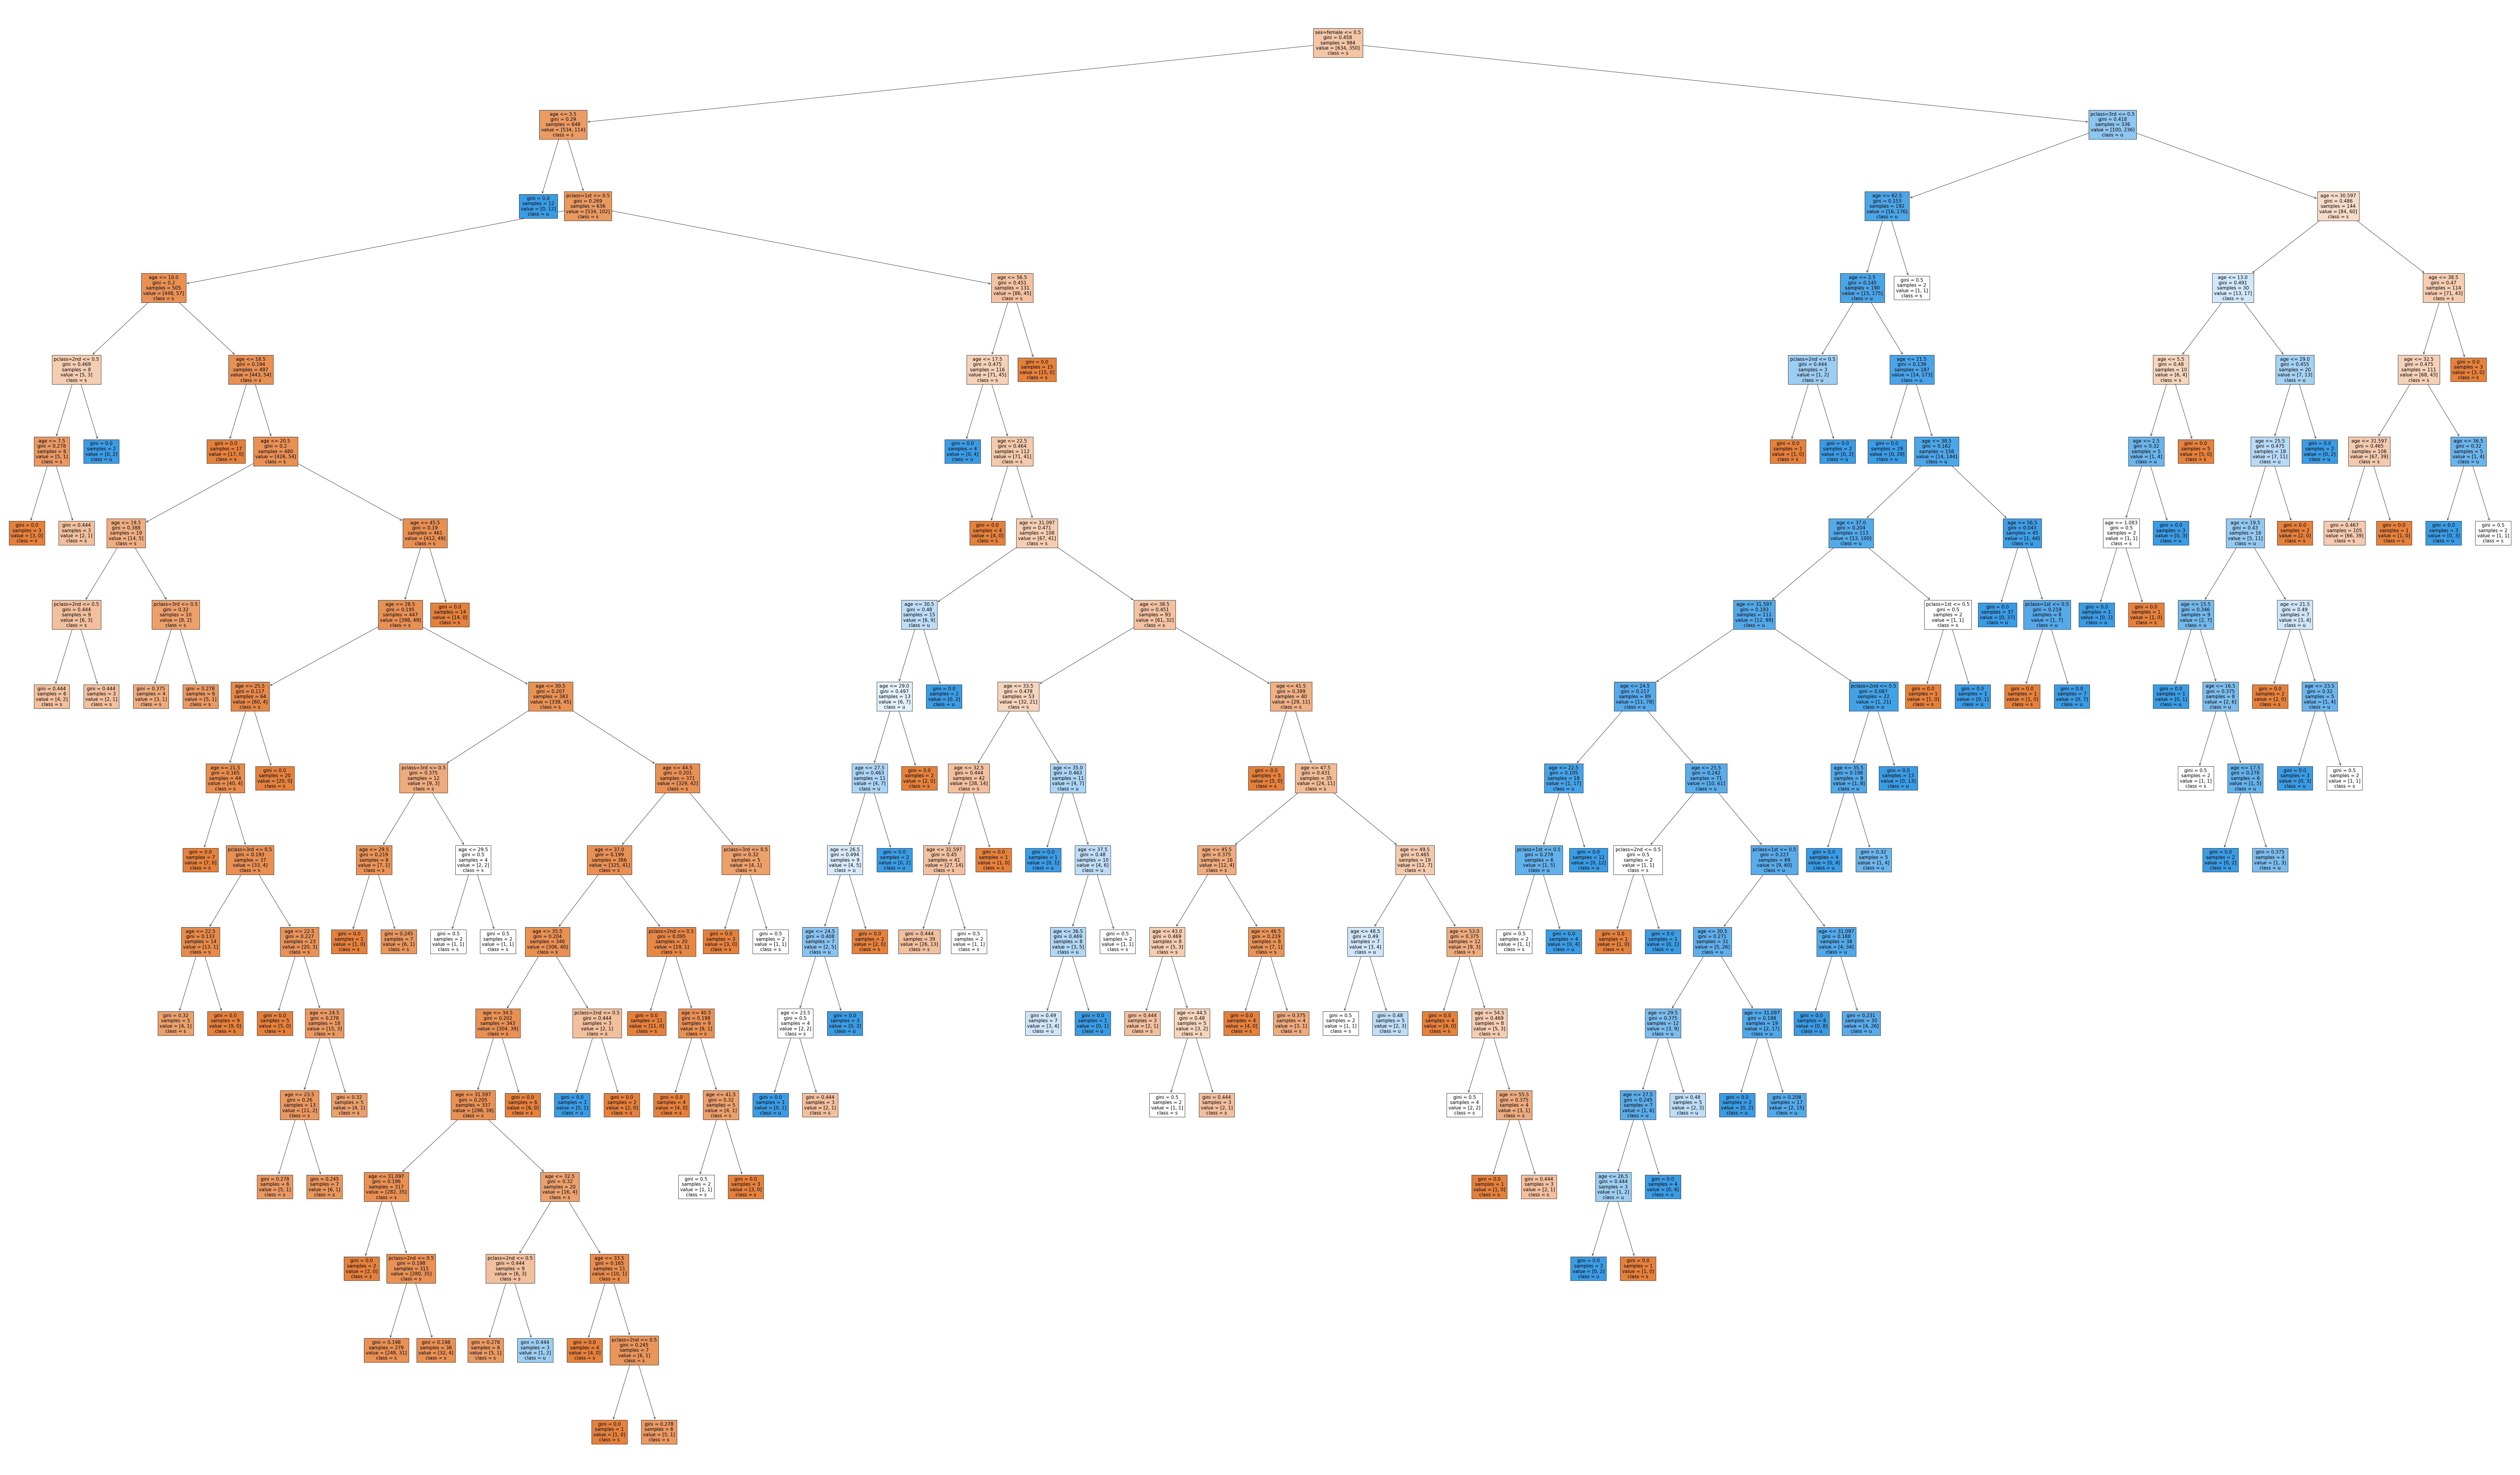

In [16]:
# 数据可视化
plt.figure(figsize=(150,90))
plot_tree(dec,filled=True,feature_names=dict.get_feature_names(), class_names='survived')
plt.show()